<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA.
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


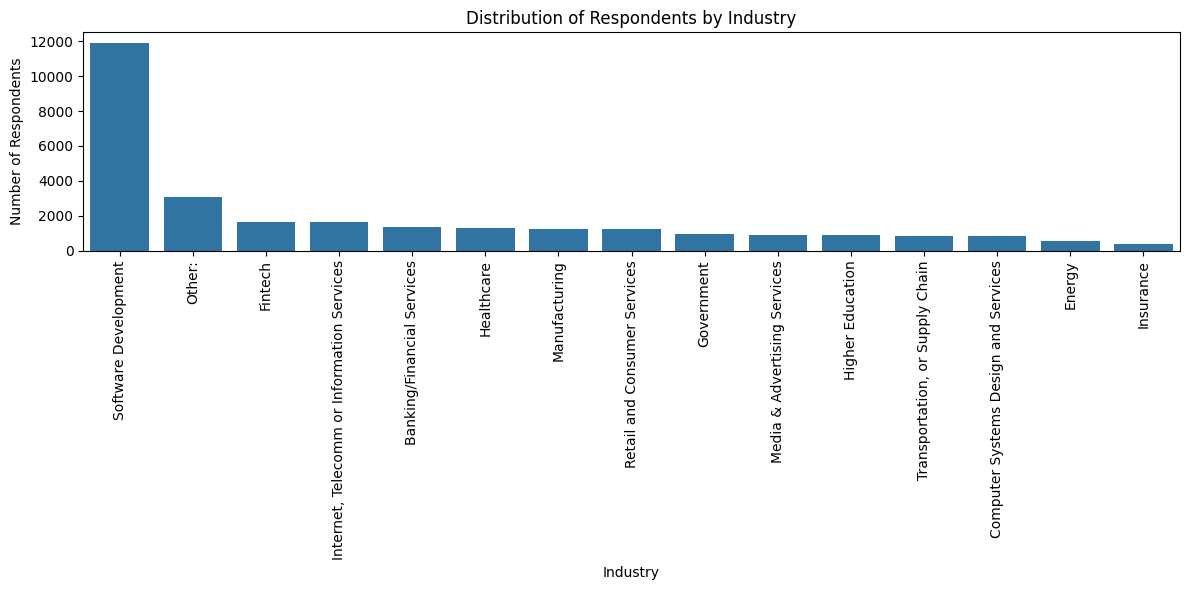

Notable Trends:
Most frequent industry: Software Development (11918 respondents)
Least frequent industry: Insurance (389 respondents)
Number of unique industries: 15


In [3]:
# Get the value counts for the 'Industry' column
industry_counts = df['Industry'].value_counts()

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=industry_counts.index, y=industry_counts.values)
plt.title('Distribution of Respondents by Industry')
plt.xlabel('Industry')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

# Print notable trends
print("Notable Trends:")
print(f"Most frequent industry: {industry_counts.index[0]} ({industry_counts.values[0]} respondents)")
if len(industry_counts) > 1:
    print(f"Least frequent industry: {industry_counts.index[-1]} ({industry_counts.values[-1]} respondents)")
print(f"Number of unique industries: {len(industry_counts)}")

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [6]:
# Calculate basic statistics
mean_comp = df['ConvertedCompYearly'].mean()
median_comp = df['ConvertedCompYearly'].median()
std_comp = df['ConvertedCompYearly'].std()

print(f"Mean ConvertedCompYearly: {mean_comp:.2f}")
print(f"Median ConvertedCompYearly: {median_comp:.2f}")
print(f"Standard Deviation ConvertedCompYearly: {std_comp:.2f}")

# Define the outlier threshold (e.g., 3 standard deviations above the mean)
outlier_threshold = mean_comp + 3 * std_comp

# Identify outliers
outliers = df[df['ConvertedCompYearly'] > outlier_threshold]

print(f"\nNumber of compensation values exceeding 3 standard deviations above the mean: {len(outliers)}")
print("\nCompensation values exceeding the threshold:")
print(outliers[['ConvertedCompYearly']].head())

Mean ConvertedCompYearly: 86155.29
Median ConvertedCompYearly: 65000.00
Standard Deviation ConvertedCompYearly: 186756.97

Number of compensation values exceeding 3 standard deviations above the mean: 89

Compensation values exceeding the threshold:
      ConvertedCompYearly
529              650000.0
828             1000000.0
1932             945000.0
2171             750000.0
2187            2000000.0


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


Q1: 32712.00
Q3: 107971.50
IQR: 75259.50
Lower Bound for Outliers: -80177.25
Upper Bound for Outliers: 220860.75

Number of outliers using IQR method: 978


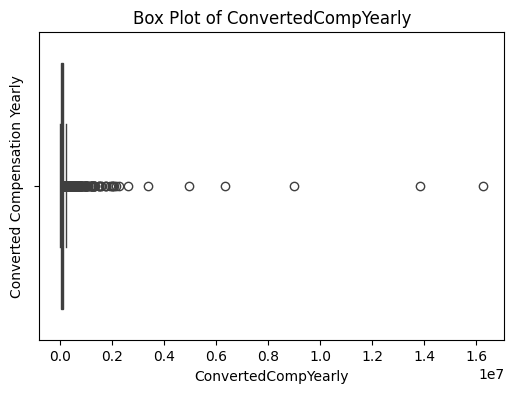

In [9]:
# Calculate Q1, Q3, and IQR
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

# Determine outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1: {Q1:.2f}")
print(f"Q3: {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Lower Bound for Outliers: {lower_bound:.2f}")
print(f"Upper Bound for Outliers: {upper_bound:.2f}")

# Count outliers
outliers_iqr = df[(df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)]
print(f"\nNumber of outliers using IQR method: {len(outliers_iqr)}")

# Visualize outliers using a box plot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['ConvertedCompYearly'])
plt.title('Box Plot of ConvertedCompYearly')
plt.ylabel('Converted Compensation Yearly')
plt.show()

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [10]:
# Create a new DataFrame excluding rows with outliers
df_cleaned = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)].copy()

# Validate the size of the new DataFrame
print(f"\nOriginal DataFrame size: {df.shape[0]} rows")
print(f"Cleaned DataFrame size (outliers removed): {df_cleaned.shape[0]} rows")
print(f"Number of rows removed (outliers): {df.shape[0] - df_cleaned.shape[0]}")


Original DataFrame size: 65437 rows
Cleaned DataFrame size (outliers removed): 22457 rows
Number of rows removed (outliers): 42980


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


['Under 18 years old' '35-44 years old' '45-54 years old'
 '18-24 years old' '25-34 years old' '55-64 years old' 'Prefer not to say'
 '65 years or older']


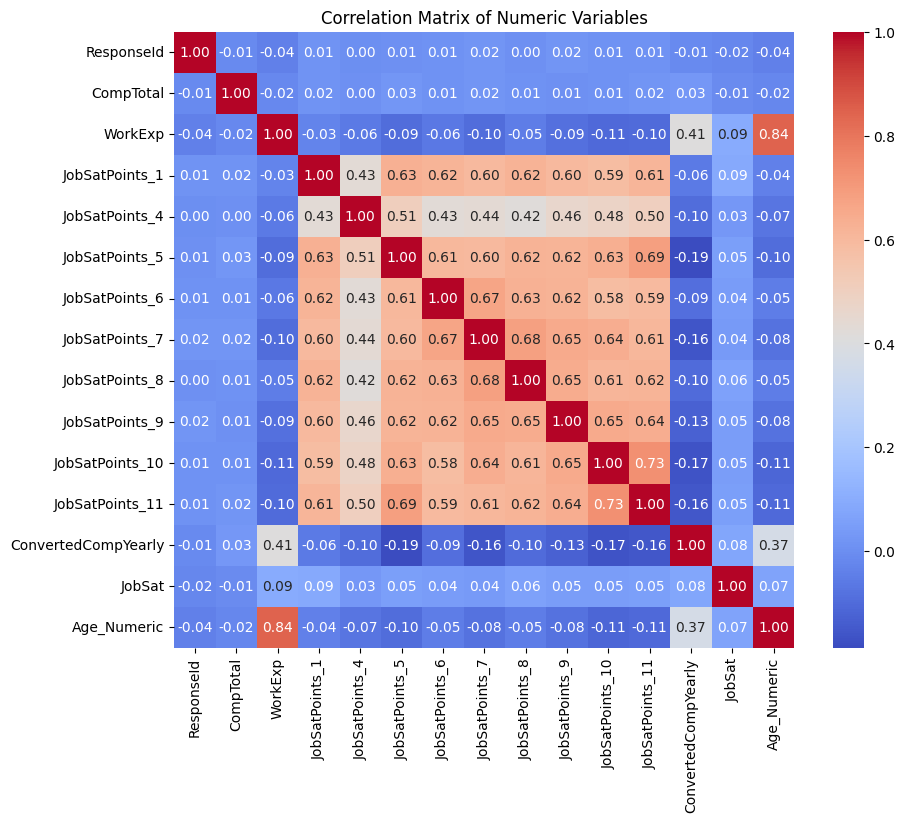

In [12]:
# Map 'Age' to numeric values (using the mean or median of the range)
print(df['Age'].unique())
age_mapping = {
    'Under 18 years old': 15,  # Approximate midpoint
    '18-24 years old': 21,     # Midpoint
    '25-34 years old': 29.5,   # Midpoint
    '35-44 years old': 39.5,   # Midpoint
    '45-54 years old': 49.5,   # Midpoint
    '55-64 years old': 59.5,   # Midpoint
    '65 years or older': 70    # Approximate
}

df_cleaned['Age_Numeric'] = df_cleaned['Age'].map(age_mapping)

# Select only numeric columns (including the new 'Age_Numeric')
numeric_cols = df_cleaned.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_cols.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
